In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

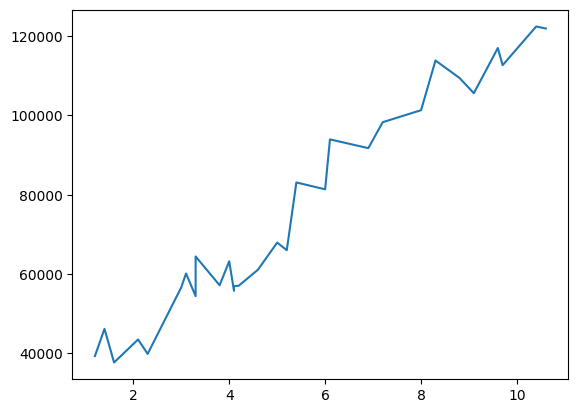

In [13]:
df = pd.read_csv('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')
x = df["YearsExperience"].values
y = df["Salary"].values
plt.plot(x,y)

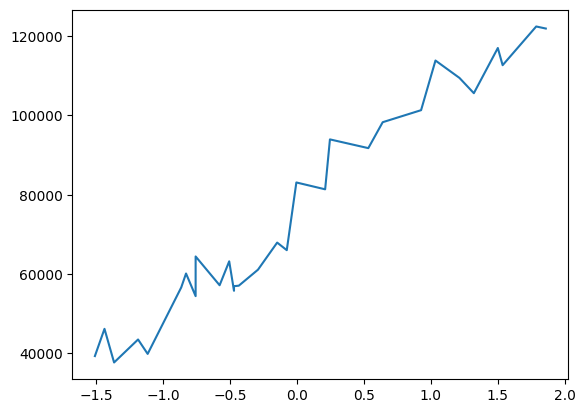

In [14]:
x = np.array(x)
y = np.array(y)

def mean(x):
    return np.sum(x)/len(x)

def variance(x):
    mu = mean(x)
    return np.sum((x-mu)**2)/len(x)

def normalization(x):
    mu = mean(x)
    standardDeviation = np.sqrt(variance(x))
    return (x-mu)/standardDeviation

x_norm = normalization(x)
plt.plot(x_norm,y)

In [20]:
class SimpleLinearRegression:
     def __init__(self, learningRate=0.01, maxIter=5000, threshold=1e-6):
         self.lr = learningRate # controls the step size at which model updates its weights to minimize the loss function during training.
         self.maxIter = maxIter # no of max iterations to avoid infinite loop
         self.threshold = threshold # if error between previous and current predicted values is less that this then stop.
        # generally threshold is 10**-6. we stop here because any more impovements in the model are negligeble.
        # learning rate = 0.01 to 0.1 provide Fast and stable convergence to the global minimum of the loss function.

        # "y = Weight * x + Bias" is the model or line that we are trying to get
         self.weight = random.uniform(-1,1)
         self.bias = random.uniform(-1,1)
         
     def predict(self, x):
         return self.weight * x + self.bias

     def loss_err(self, x, y):
         y_pred = self.predict(x)
         errors = y - y_pred
         loss = (1 / (2 * len(x))) * np.sum(errors ** 2)
         return errors, loss

     def fit(self, x, y):
         x = np.array(x)
         y = np.array(y)
         loss_history = []

         errors, prev_loss = self.loss_err(x, y)
         loss_history.append(prev_loss)

         for _ in range(self.maxIter):
            # Gradient calculation
             dW = (1 / len(x)) * np.sum(errors * x)
             dB = (1 / len(x)) * np.sum(errors)

            # Update parameters
             self.weight += self.lr * dW
             self.bias += self.lr * dB

            # Compute new loss and errors
             errors, current_loss = self.loss_err(x, y)
             loss_history.append(current_loss)

            # Check for convergence
             if abs(prev_loss - current_loss) < self.threshold:
                 break

             prev_loss = current_loss
         self.plot(x,y)
         return loss_history

     def plot(self, x, y):
         y_pred = self.predict(x)
         plt.plot(x,y)
         plt.plot(x,y_pred)

In [21]:
lr_model = SimpleLinearRegression()

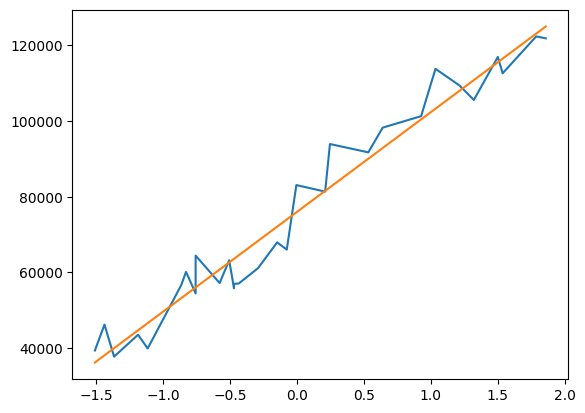

In [22]:
loss_history = lr_model.fit(x_norm, y)

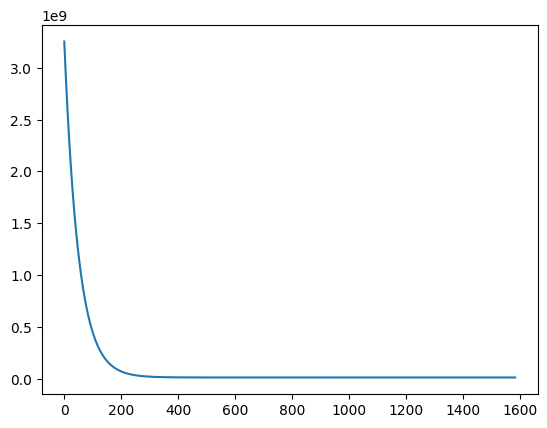

In [23]:
plt.plot(loss_history)